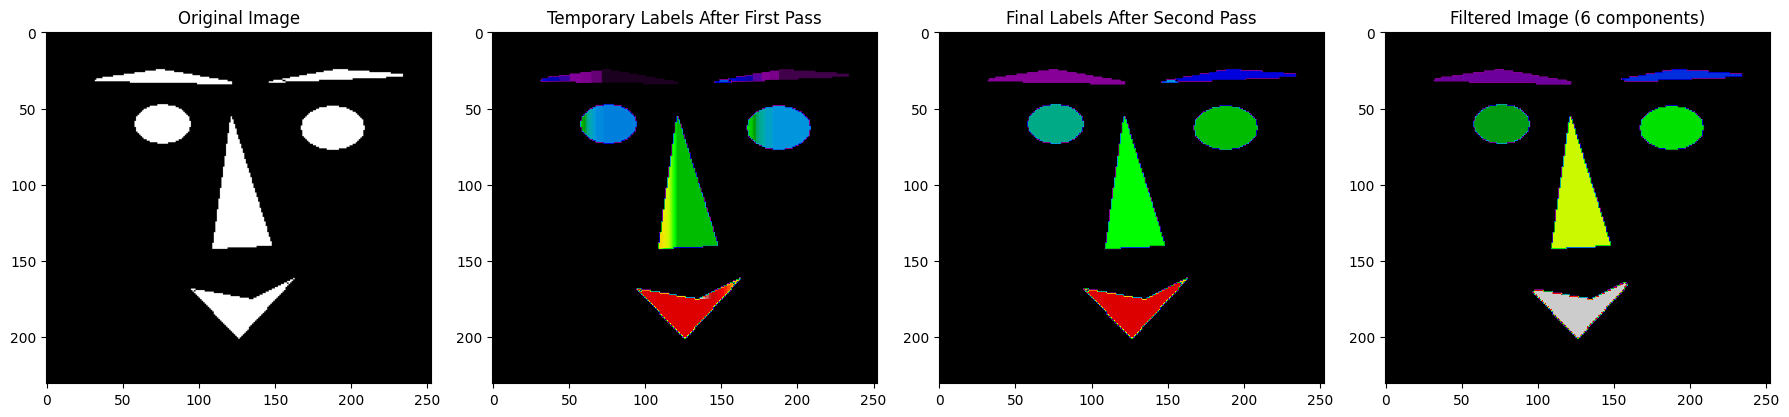

Number of connected components after filtering: 6


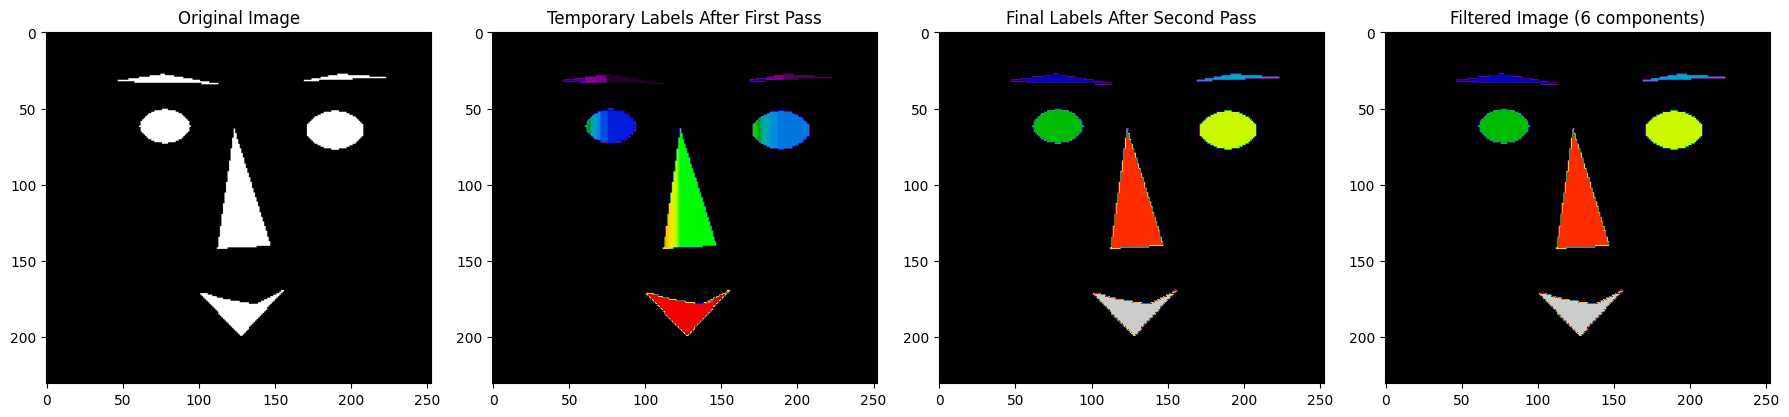

Number of connected components after filtering: 6


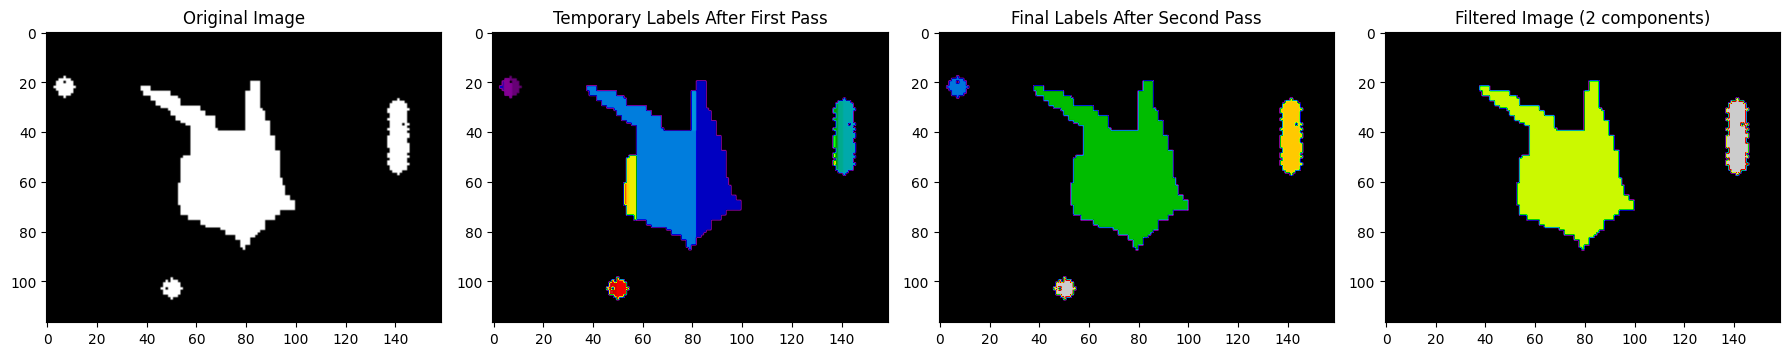

Number of connected components after filtering: 2


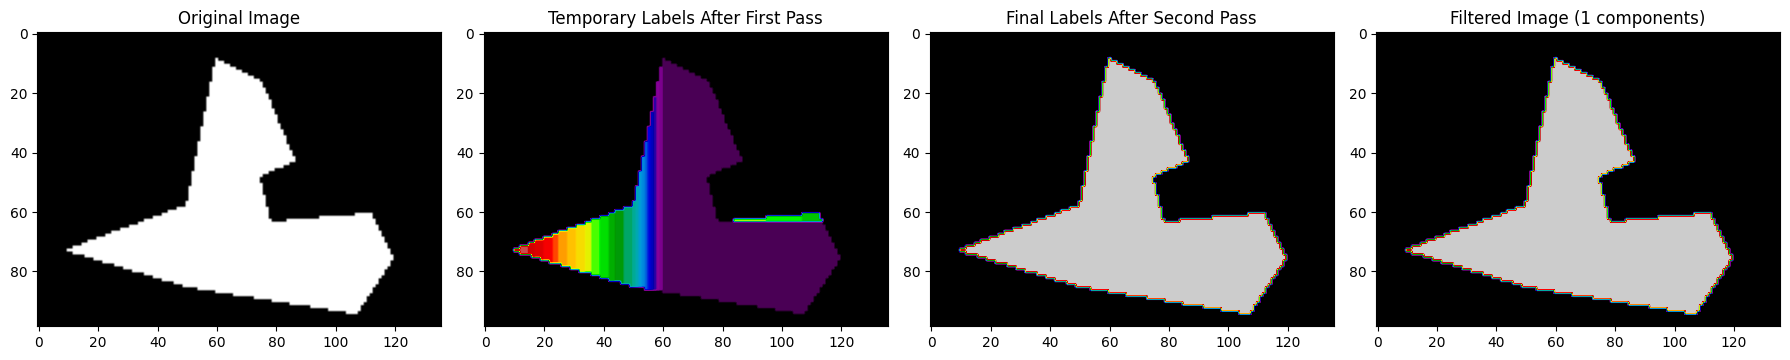

Number of connected components after filtering: 1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def connected_component_labeling_4connectivity(img):
    img = img.astype(bool)
    rows, cols = img.shape
    label_img = np.zeros((rows, cols), dtype=int)
    current_label = 1  
    equiv = [] 
    for r in range(rows):
        for c in range(cols):
            if img[r, c]:
                left = label_img[r, c - 1] if c > 0 else 0
                top = label_img[r - 1, c] if r > 0 else 0
                
                if left == 0 and top == 0:
                    label_img[r, c] = current_label
                    current_label += 1
                elif left != 0 and top == 0:
                    label_img[r, c] = left
                elif left == 0 and top != 0:
                    label_img[r, c] = top
                else:
                    label_img[r, c] = min(left, top)
                    equiv.append((min(left, top), max(left, top)))
    
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 4, 1)
    plt.title("Original Image")
    plt.imshow(img, cmap="gray")
    
    plt.subplot(1, 4, 2)
    plt.title("Temporary Labels After First Pass")
    plt.imshow(label_img, cmap="nipy_spectral")
    
    parent = list(range(current_label))
    
    def find(x):
        if parent[x] != x:
            parent[x] = find(parent[x])
        return parent[x]
    
    def union(x, y):
        root_x = find(x)
        root_y = find(y)
        if root_x != root_y:
            parent[root_y] = root_x
    
    for x, y in equiv:
        union(x, y)

    final_labels = {}
    next_label = 1
    for r in range(rows):
        for c in range(cols):
            if label_img[r, c] > 0:
                root = find(label_img[r, c])
                if root not in final_labels:
                    final_labels[root] = next_label
                    next_label += 1
                label_img[r, c] = final_labels[root]
    
    plt.subplot(1, 4, 3)
    plt.title("Final Labels After Second Pass")
    plt.imshow(label_img, cmap="nipy_spectral")
    
    num_components = len(final_labels)
    
    filtered_img, num_filtered_components = filtesr(label_img, min_size=50)
    
    plt.subplot(1, 4, 4)
    plt.title(f"Filtered Image ({num_filtered_components} components)")
    plt.imshow(filtered_img, cmap="nipy_spectral")
    
    plt.tight_layout()
    plt.show()
    
    return filtered_img, num_filtered_components


def filtesr(label_img, min_size=50):
    component_sizes = np.bincount(label_img.ravel())
    filtered_img = np.zeros_like(label_img)
    for label in np.unique(label_img):
        if label == 0:  
            continue
        if component_sizes[label] >= min_size:
            filtered_img[label_img == label] = label
    n_components = len(np.unique(filtered_img)) - 1
    return filtered_img, n_components


# Example Usage
if __name__ == "__main__":
    # Load image using OpenCV
    import cv2
    l = ["face_old.bmp", "face.bmp", "gun.bmp", "test.bmp"]
    for i in range(0,len(l)):
        img = cv2.imread(l[i], cv2.IMREAD_GRAYSCALE)  
        _, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
        img = img // 255
    
        label_img, num_components = connected_component_labeling_4connectivity(img)
        print(f"Number of connected components after filtering: {num_components}")